# Central Limit Theorem

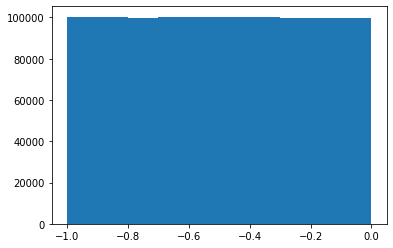

In [7]:
import numpy as np
import matplotlib.pyplot as plt
arr = np.random.uniform(-1,0,1000000)
plt.hist(arr)
plt.show()

In [3]:
arr.shape

(1000000,)

In [8]:
%%time 
import numpy as np
arr1=[]
for i in range(100000):
  arr1.append(np.mean(np.random.choice(arr, size=10000)))

Wall time: 21.5 s


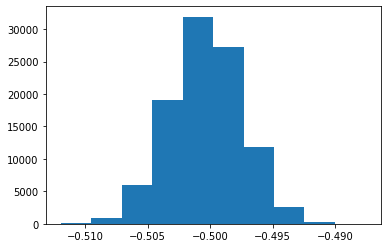

In [6]:
plt.hist(arr1)
plt.show()

# MNIST

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression


from sklearn.utils import check_random_state

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000


In [15]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

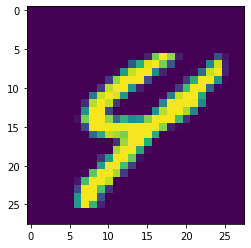

In [56]:
data_0=X_train.values.reshape(-1,28,28)[:1,:,:].reshape(28,28)
plt.imshow(data_0)
plt.show()

In [38]:
y_train[:1]

60149    2
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

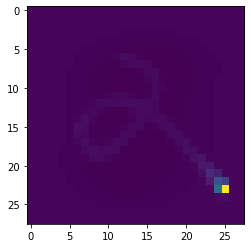

In [41]:
data_0=X_train.reshape(-1,28,28)[:1,:,:].reshape(28,28)
plt.imshow(data_0)
plt.show()

# Gausian NB

In [90]:
%%time 
from sklearn.naive_bayes import GaussianNB
model = None
model = GaussianNB()
model.fit(X_train, y_train)

Wall time: 1.25 s


GaussianNB()

In [91]:
%%time 
from sklearn.metrics import accuracy_score
pred_train=model.predict(X_train)
print('accuracy_score on training data : ',accuracy_score(y_train,pred_train))

pred_test=model.predict(X_test)
print('accuracy_score on test data: ',accuracy_score(y_test,pred_test))

accuracy_score on training data :  0.5681785714285714
accuracy_score on test data:  0.5614285714285714
Wall time: 6.23 s


# MultinomialNB

In [84]:
%%time 
##  frequency of words
from sklearn.naive_bayes import MultinomialNB
model = None
model = MultinomialNB()
model.fit(X_train, y_train)

Wall time: 0 ns


MultinomialNB()

In [86]:
%%time 
from sklearn.metrics import accuracy_score
pred_train=model.predict(X_train)
print('accuracy_score on training data : ',accuracy_score(y_train,pred_train))

pred_test=model.predict(X_test)
print('accuracy_score on test data: ',accuracy_score(y_test,pred_test))

Wall time: 0 ns
accuracy_score on training data :  0.8279285714285715
accuracy_score on test data:  0.8217142857142857


# BernoulliNB

In [82]:
%%time 
##  word occurrence vectors (rather than word count vectors) 
from sklearn.naive_bayes import BernoulliNB
model = None
model = BernoulliNB()
model.fit(X_train, y_train)

Wall time: 0 ns


BernoulliNB()

In [83]:
from sklearn.metrics import accuracy_score
pred_train=model.predict(X_train)
print('accuracy_score on training data : ',accuracy_score(y_train,pred_train))

pred_test=model.predict(X_test)
print('accuracy_score on test data: ',accuracy_score(y_test,pred_test))

accuracy_score on training data :  0.833625
accuracy_score on test data:  0.8279285714285715


# CategoricalNB

In [80]:
%%time 
# CategoricalNB assumes that the sample matrix is encoded 
# (for instance with the help of OrdinalEncoder) 
# such that all categories for each feature are represented with numbers 0,1,2,..n-1
# where ni is the number of available categories of feature i.

from sklearn.naive_bayes import CategoricalNB
model = None
model = CategoricalNB()
model.fit(X_train, y_train)

Wall time: 0 ns


CategoricalNB()

In [81]:
from sklearn.metrics import accuracy_score
pred_train=model.predict(X_train)
print('accuracy_score on training data : ',accuracy_score(y_train,pred_train))

pred_test=model.predict(X_test)
print('accuracy_score on test data: ',accuracy_score(y_test,pred_test))

accuracy_score on training data :  0.9024642857142857


IndexError: index 236 is out of bounds for axis 1 with size 158

# ComplementNB

In [93]:
%%time 
# CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm 
# that is particularly suited for imbalanced data sets.
from sklearn.naive_bayes import ComplementNB
model = None
model = ComplementNB()
model.fit(X_train, y_train)

Wall time: 302 ms


ComplementNB()

In [94]:
from sklearn.metrics import accuracy_score
pred_train=model.predict(X_train)
print('accuracy_score on training data : ',accuracy_score(y_train,pred_train))

pred_test=model.predict(X_test)
print('accuracy_score on test data: ',accuracy_score(y_test,pred_test))

accuracy_score on training data :  0.7185714285714285
accuracy_score on test data:  0.7115


# Out-of-core naive Bayes model fitting

In [ ]:
# MultinomialNB, BernoulliNB, and GaussianNB expose a partial_fit